In [1]:
#%pip install seaborn
#%matplotlib inline
#%pip install requests
#%pip install openpyxl
#%pip install xlrd
#%pip install regex

In [2]:
# librerias

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import regex as re
import statistics as stats


# para pintar

import pylab as plt
import seaborn as sns

#para que salga el grafico
%matplotlib inline

In [3]:
data_ori = pd.read_csv('Data/attacks.csv', encoding='latin1')

In [4]:
data= data_ori.copy()

In [5]:
data.head(30)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,NaN,NaN


In [6]:
data.shape

(25723, 24)

In [7]:
# ELIMINAMOS DUPLICADOS

In [8]:
data.drop_duplicates(inplace = True)

In [9]:
data.shape

(6312, 24)

In [10]:
nancols = data.isnull().sum()
len(nancols[nancols>5050])  # COLUMNAS CON MÁS DEL 80% DE VALORES NULOS

2

In [11]:
lista=[]
nancols1=nancols[nancols>5050].index
for name in nancols1:
    lista.append(name)

print(lista)

['Unnamed: 22', 'Unnamed: 23']


In [12]:
data.drop(columns= lista, index = 1, inplace = True)

In [13]:
data.shape

(6311, 22)

In [14]:
def check_nan(df: pd.DataFrame) -> None:
    
    nan_cols=df.isna().mean() * 100  # el porcentaje
    
    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    plt.figure(figsize=(10, 6))  # inicia la figura y establece tamaño

    sns.heatmap(df.isna(),  # mapa de calor
                yticklabels=False,
                cmap='viridis',
                cbar=False)

    plt.show();

'N nan cols: 22'

Case Number                0.031691
Date                       0.158453
Year                       0.190144
Type                       0.221835
Country                    0.950721
Area                       7.368087
Location                   8.714942
Activity                   8.778324
Name                       3.485977
Sex                        9.111076
Age                       45.016638
Injury                     0.602123
Fatal (Y/N)                8.699097
Time                      53.303755
Species                   45.111710
Investigator or Source     0.427824
pdf                        0.158453
href formula               0.174299
href                       0.158453
Case Number.1              0.158453
Case Number.2              0.158453
original order             0.047536
dtype: float64

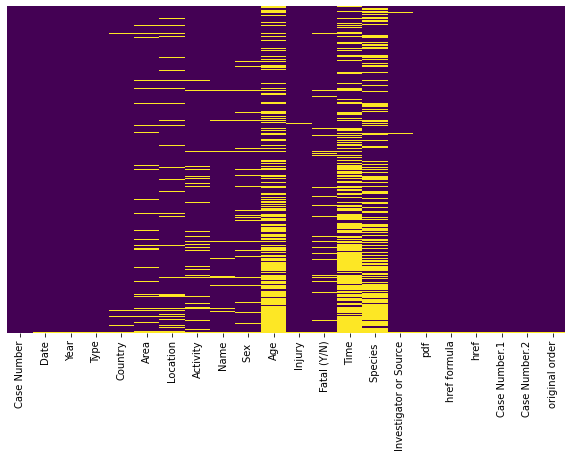

In [15]:
check_nan(data)   # AQUI PUEDO SABER QUE COLUMNA PUEDO ESTUDIAR MEJOR SIN FALSEAR DATOS

In [16]:
data.columns=[c.lower().replace(' ', '') for c in data.columns]

In [17]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0


In [18]:
data.columns=[c.replace('.', '') for c in data.columns]

In [19]:
data.columns

Index(['casenumber', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal(y/n)', 'time',
       'species', 'investigatororsource', 'pdf', 'hrefformula', 'href',
       'casenumber1', 'casenumber2', 'originalorder'],
      dtype='object')

In [20]:
data.casenumber1.unique() == data.casenumber2.unique()

False

In [21]:
data[(data.casenumber1 != data.casenumber2)].tail(11)    # AQUI VEO QUE HAY MUCHAS FILAS CON MUCHOS DATOS NULOS

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder
6122,1808.06.01.R,Reported 01-May-1808,1808.0,Sea Disaster,ANTIGUA,NaN,Falmouth Harbour,NaN,NaN,NaN,NaN,Probable drowning & scavenging,NaN,NaN,NaN,"London Observer, 5/1/1808",1808.05.01.R-Antigua.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1808.05.01.R,1808.06.01.R,181.0
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6305.0
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data.drop([6302, 6303, 6304, 6305, 6306, 6307, 6308, 6309, 8702, 25722], axis = 0 , inplace=True)

In [23]:
data.shape

(6301, 22)

In [24]:
nancols = data.isnull().sum()
nancols[nancols>0]

casenumber                 1
year                       2
type                       4
country                   50
area                     455
location                 540
activity                 544
name                     210
sex                      565
age                     2831
injury                    28
fatal(y/n)               539
time                    3354
species                 2837
investigatororsource      17
hrefformula                1
dtype: int64

In [25]:
lista=[]
for e in data.casenumber:
    
    e=str(e)
    #print(e)
    
    e = e.replace('.', '-')
    e = e.replace(',', '-')
    lista.append(e)

In [26]:
data['casenumber']=lista

In [27]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder
0,2018-06-25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
2,2018-06-09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018-06-08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018-06-04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
5,2018-06-03-b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0


In [28]:
data.casenumber.fillna('unknown').head()

0      2018-06-25
2      2018-06-09
3      2018-06-08
4      2018-06-04
5    2018-06-03-b
Name: casenumber, dtype: object

In [29]:
lista2=[]
for e in data.casenumber:
    lista2.append('-'.join(e.split('-')[:3]))
            
    

In [30]:
data['casenumber']=lista2

In [31]:
data.tail()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder
6297,ND-0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND-0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND-0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,ND-0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0
6301,ND-0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0


In [32]:
data.shape

(6301, 22)

In [33]:
lista3= []
for e in data.casenumber:
    #print(e)
    if len(e) == 10:
        lista3.append(e)
    else:
        lista3.append(np.nan)
        

In [34]:
data['casenumber']=lista3    # TRANSFORMO LOS VALORES QUE SEAN INVÁLIDOS EN 'N'

In [35]:
def limpiar(string):
    
    try:
        return string.split('-')     # SEPARAR UNA COLUMNA POR AÑO, MES Y DIA
    except:
        return [np.nan, np.nan, np.nan]

In [36]:
lst=[]

for e in data.casenumber:
    lst.append(limpiar(e))
    
print(len(lst))


6301


In [37]:
data[['year_casenumber', 'month_casenumber', 'day_casenumber']]=lst

In [38]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder,year_casenumber,month_casenumber,day_casenumber
0,2018-06-25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,2018,06,25
2,2018-06-09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,2018,06,09
3,2018-06-08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,2018,06,08
4,2018-06-04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,2018,06,04
5,2018-06-03,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,2018,06,03


In [39]:
data.date.replace({'Reported': '', ' ': '-'}, inplace = True)


In [40]:
lista=[]
for e in data.date:
    #print(e)
    lista.append(e.strip())  #QUITO ESPACIOS DELANTE Y DETRAS
    
data['date']=lista

In [41]:
lista=[]
for e in data.date:
    if len(e) < 8:
        lista.append(np.nan)   # ANULO COLUMNAS QUE NO TENGAN MES
    else:
        lista.append(e)    

In [42]:
data['date']=lista

In [43]:
nancols = data.isnull().sum()
nancols[nancols>0]

casenumber               135
date                     314
year                       2
type                       4
country                   50
area                     455
location                 540
activity                 544
name                     210
sex                      565
age                     2831
injury                    28
fatal(y/n)               539
time                    3354
species                 2837
investigatororsource      17
hrefformula                1
year_casenumber          135
month_casenumber         135
day_casenumber           135
dtype: int64

In [44]:
(re.findall('[0-9]+', '03-May-2200')[0])

'03'

In [45]:
lista=[]

for e in data.date:
    e=str(e)
    
    if len(e) == 11:
        lista.append((re.findall('[0-9]+', e)[0]))
    else:
        lista.append('n')
        
#print(lista)           # EN VEZ DE PONER NULOS, PONGO 'N' PARA QUE SE PUEDA ITERAR
            

In [46]:
lista2=[]

for e in lista:
    
    if len(e) == 1 and e.isdigit():
        lista2.append('0' + e)
    else:
        lista2.append(e)

#print(lista2)     

In [47]:
data['day_date']= lista2

In [48]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder,year_casenumber,month_casenumber,day_casenumber,day_date
0,2018-06-25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,2018,06,25,25
2,2018-06-09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,2018,06,09,09
3,2018-06-08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,2018,06,08,08
4,2018-06-04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,2018,06,04,04
5,2018-06-03,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,2018,06,03,03


In [49]:
lista4=[]
for e in data.date:
    e=str(e)
    if len(e) == 11:     # EL 86% DE LAS COLUMNAS TIENEN LOS DATOS BIEN PUESTOS
        lista4.append(e)
        
len((lista4))

4884

In [50]:
data.shape

(6301, 26)

In [51]:
lista=[]

for e in data.date:
    e=str(e)
    
    if len(e) == 11:
        lista.append(re.findall('[a-z,A-Z]+-', e))          #LETRAS
    else:
        lista.append(['n'])
        
        
print(len(lista))                   # ESTO ME DA UNA LISTA DE LISTAS

lista2=[]

for e in lista: 
    if len(e) == 0:        
        lista2 += 'n'
    lista2 += e
    
len(lista2)   # LISTAS CON EL MES + '-'

#print(lista)

6301


6301

In [52]:
lista3=[]

for e in lista2:
    e= str(e)
    if len(e) == 4:
        e = e.replace('-', '')
        lista3.append(e)
    
    elif len(e) != 4:
        lista3.append('n')   #QUITO TODOS LOS DEMAS PORQUE ME MOLESTAN

len(lista3)     # LISTA CON LOS MESES ESCRITOS CON LETRAS
        

6301

In [53]:
lista4=[]

for e in lista3:
    e= str(e).lower()
    #print(e)
    
    if e == 'jan':
        lista4.append('01')
        
    if e == 'feb':
        lista4.append('02')
        
    if e == 'mar':
        lista4.append('03')
        
    if e == 'apr':
        lista4.append('04')
        
    if e == 'may':
        lista4.append('05')
        
    if e == 'jun':
        lista4.append('06')
        
    if e == 'jul':
        lista4.append('07')
        
    if e == 'aug':
        lista4.append('08')
        
    if e == 'sep':
        lista4.append('09')
        
    if e == 'oct':
        lista4.append('10')
        
    if e == 'nov':
        lista4.append('11')
        
    if e == 'dec':
        lista4.append('12')
        
    if e == 'n':
        lista4.append('n')
#     else:
#         lista4.append(e)          # LISTA CON NOMBRES DE MES EN DOS DIGITOS
        
len(lista4)

6301

In [54]:
data['month_date'] = lista4

In [55]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder,year_casenumber,month_casenumber,day_casenumber,day_date,month_date
0,2018-06-25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,2018,06,25,25,06
2,2018-06-09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,2018,06,09,09,06
3,2018-06-08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,2018,06,08,08,06
4,2018-06-04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,2018,06,04,04,06
5,2018-06-03,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,2018,06,03,03,06


In [56]:
nancols = data.isnull().sum()
nancols[nancols>0]            # YEAR TIENE 2 VALORES NULOS

casenumber               135
date                     314
year                       2
type                       4
country                   50
area                     455
location                 540
activity                 544
name                     210
sex                      565
age                     2831
injury                    28
fatal(y/n)               539
time                    3354
species                 2837
investigatororsource      17
hrefformula                1
year_casenumber          135
month_casenumber         135
day_casenumber           135
dtype: int64

In [57]:
data[data.year.isnull()].head()  # FILAS DONDE YEAR SEA NULO POR SI LAS PUEDO RELLENAR

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder,year_casenumber,month_casenumber,day_casenumber,day_date,month_date
187,2017-01-08,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0,2017,01,08,n,n
6079,1836-08-19,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0,1836,08,19,n,n


In [58]:
data.at[187, 'year']= 2017

In [59]:
data.at[6079, 'year']= 1836

In [60]:
lista=[]
for e in data.year:
    e= round(e)
    lista.append(e)

In [61]:
data['year'] = lista

In [62]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder,year_casenumber,month_casenumber,day_casenumber,day_date,month_date
0,2018-06-25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,2018,06,25,25,06
2,2018-06-09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,2018,06,09,09,06
3,2018-06-08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,2018,06,08,08,06
4,2018-06-04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,2018,06,04,04,06
5,2018-06-03,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,2018,06,03,03,06


In [63]:
data[data.day_casenumber != data.day_date].head()  # TENGO MUCHOS VALORES DE DIA DIFERENTES

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder,year_casenumber,month_casenumber,day_casenumber,day_date,month_date
14,2018-05-00,May 2018,2018,Provoked,AUSTRALIA,Westerm Australia,Dugong Bay,Feeding sharks,Melisa Brunning,F,34,Shallow lacerations to finger PROVOKED INCIDENT,N,NaN,"Tawny nurse shark, 2m","Perth Now, 6/30/2018",2018.05.00-Brunning.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.00,2018.05.00,6289.0,2018,05,00,n,n
17,2018-04-30,Reported 30-Apr-2018,2018,Unprovoked,THAILAND,Hua Hin,Sai Noi Beach,Swimming,female,M,NaN,Minor injury to ankle,N,NaN,NaN,"K. McMurray, TrackingSharks.com",2018.04.30.R-Thailand.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.30.R,2018.04.30.R,6286.0,2018,04,30,n,n
31,2018-04-10,Reported 10-Apr-2018,2018,Invalid,BRAZIL,Alagoas,"Praia de Sauaçuhy, Maceió",Fishing,Josias Paz,M,56,Injury to ankle from marine animal trapped in ...,N,NaN,Shark involvement not confirmed,"K. McMurray, TrackingSharks.com",2018.04.10.R-Paz.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.10.R,2018.04.10.R,6272.0,2018,04,10,n,n
37,2018-03-09,9-Mar-2018,2018,Unprovoked,AUSTRALIA,Victoria,Lorne,Swimming,Rob Crossland,M,69,"No injury, said to have been charged by sharks...",N,15h30,3.5 m shark,"B. Myatt, GSAF",2018.03.09.b-Crossland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.03.09.b,2018.03.09.b,6266.0,2018,03,09,n,n
38,2018-03-09,9-Mar-2018,2018,Unprovoked,AUSTRALIA,Victoria,Winkipop,Surfing,Lachie Brown,M,18,"Minor injury, ankle grazed",N,07h30,1.8 m shark,"B. Myatt, GSAF",2018.03.09.a-Weight.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.03.09.a,2018.03.09.a,6265.0,2018,03,09,n,n


In [64]:
lista=[]
for e in data.day_date:
    if len(e) > 2:
        lista.append('n')
    else:
        lista.append(e)       # QUITO TODOS LOS VALORES DE DAY_DATE QUE NO SEAN DIAS

#print(lista)


In [65]:
data['day_date']= lista

In [66]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder,year_casenumber,month_casenumber,day_casenumber,day_date,month_date
0,2018-06-25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,2018,06,25,25,06
2,2018-06-09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,2018,06,09,09,06
3,2018-06-08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,2018,06,08,08,06
4,2018-06-04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,2018,06,04,04,06
5,2018-06-03,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,2018,06,03,03,06


In [67]:
lista=[]
for e in data.day_casenumber:
    if e == '00':
        lista.append('n')
    else:
        lista.append(e)
        
#print(lista)

In [68]:
data['day_casenumber']= lista

In [69]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder,year_casenumber,month_casenumber,day_casenumber,day_date,month_date
0,2018-06-25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,2018,06,25,25,06
2,2018-06-09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,2018,06,09,09,06
3,2018-06-08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,2018,06,08,08,06
4,2018-06-04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,2018,06,04,04,06
5,2018-06-03,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,2018,06,03,03,06


In [70]:
data.day_date.replace('n', np.nan, inplace=True)
data.month_date.replace('n', np.nan, inplace=True)

In [71]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder,year_casenumber,month_casenumber,day_casenumber,day_date,month_date
0,2018-06-25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,2018,06,25,25,06
2,2018-06-09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,2018,06,09,09,06
3,2018-06-08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,2018,06,08,08,06
4,2018-06-04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,2018,06,04,04,06
5,2018-06-03,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,2018,06,03,03,06


In [72]:
data.shape

(6301, 27)

In [73]:
data.dropna(subset=['year_casenumber', 'month_casenumber', 'day_casenumber', 'day_date', 'month_date'], inplace=True, how='all')

In [74]:
data.shape   # BORRO LAS FILAS DONDE NO TENGA UNA FECHA CLARA

(6170, 27)

In [75]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber1,casenumber2,originalorder,year_casenumber,month_casenumber,day_casenumber,day_date,month_date
0,2018-06-25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,2018,06,25,25,06
2,2018-06-09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,2018,06,09,09,06
3,2018-06-08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,2018,06,08,08,06
4,2018-06-04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,2018,06,04,04,06
5,2018-06-03,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,2018,06,03,03,06


In [76]:
data.day_date.unique()

array(['25', '09', '08', '04', '03', '27', '26', '24', '21', '13', nan,
       '12', '28', '23', '22', '19', '15', '14', '05', '31', '18', '11',
       '01', '30', '20', '16', '10', '02', '29', '07', '17', '06'],
      dtype=object)

In [77]:
nancols = data.isnull().sum()
nancols[nancols>0]              # ES MAS FACIL QUEDARME CON _CASENUMBER

casenumber                 4
date                     301
type                       4
country                   46
area                     429
location                 504
activity                 524
name                     205
sex                      557
age                     2714
injury                    27
fatal(y/n)               538
time                    3230
species                 2744
investigatororsource      17
hrefformula                1
year_casenumber            4
month_casenumber           4
day_casenumber             4
day_date                1362
month_date              1367
dtype: int64

In [78]:
data.columns

Index(['casenumber', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal(y/n)', 'time',
       'species', 'investigatororsource', 'pdf', 'hrefformula', 'href',
       'casenumber1', 'casenumber2', 'originalorder', 'year_casenumber',
       'month_casenumber', 'day_casenumber', 'day_date', 'month_date'],
      dtype='object')

In [79]:
orden = ['year_casenumber','month_casenumber', 'day_casenumber', 'country', 'fatal(y/n)','sex', 'age', 'species', 'activity', 'type', 'area', 'location', 'name', 'injury', 'time', 'investigatororsource', 'originalorder', 'date', 'casenumber', 'casenumber1', 'casenumber2', 'pdf', 'hrefformula', 'href']
data= data[orden]

In [80]:
data = data.rename(columns= {'year_casenumber':'year', 'month_casenumber': 'month', 'day_casenumber': 'day'})

In [81]:
data.head()

,year,month,day,country,fatal(y/n),sex,age,species,activity,type,area,location,name,injury,time,investigatororsource,originalorder,date,casenumber,casenumber1,casenumber2,pdf,hrefformula,href
0,2018,06,25,USA,N,F,57,White shark,Paddling,Boating,California,"Oceanside, San Diego County",Julie Wolfe,"No injury to occupant, outrigger canoe and pad...",18h00,"R. Collier, GSAF",6303.0,25-Jun-2018,2018-06-25,2018.06.25,2018.06.25,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018,06,09,USA,N,M,48,NaN,Surfing,Invalid,Hawaii,"Habush, Oahu",John Denges,Injury to left lower leg from surfboard skeg,07h45,"K.McMurray, TrackingSharks.com",6301.0,09-Jun-2018,2018-06-09,2018.06.09,2018.06.09,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2018,06,08,AUSTRALIA,N,M,NaN,2 m shark,Surfing,Unprovoked,New South Wales,Arrawarra Headland,male,Minor injury to lower leg,NaN,"B. Myatt, GSAF",6300.0,08-Jun-2018,2018-06-08,2018.06.08,2018.06.08,2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2018,06,04,MEXICO,N,M,NaN,"Tiger shark, 3m",Free diving,Provoked,Colima,La Ticla,Gustavo Ramos,Lacerations to leg & hand shark PROVOKED INCIDENT,NaN,A .Kipper,6299.0,04-Jun-2018,2018-06-04,2018.06.04,2018.06.04,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
5,2018,06,03,AUSTRALIA,N,M,NaN,NaN,Kite surfing,Unprovoked,New South Wales,"Flat Rock, Ballina",Chris,"No injury, board bitten",NaN,"Daily Telegraph, 6/4/2018",6298.0,03-Jun-2018,2018-06-03,2018.06.03.b,2018.06.03.b,2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


In [82]:
nancols = data.isnull().sum()
nancols[nancols>0]

year                       4
month                      4
day                        4
country                   46
fatal(y/n)               538
sex                      557
age                     2714
species                 2744
activity                 524
type                       4
area                     429
location                 504
name                     205
injury                    27
time                    3230
investigatororsource      17
date                     301
casenumber                 4
hrefformula                1
dtype: int64

In [83]:
borrar = data[data.month.isnull()].index  #BORRO LAS FILAS DONDE MONTH SEA NULO

In [84]:
data.drop(borrar, axis=0, inplace = True)

In [85]:
data[data.month == '94']

,year,month,day,country,fatal(y/n),sex,age,species,activity,type,area,location,name,injury,time,investigatororsource,originalorder,date,casenumber,casenumber1,casenumber2,pdf,hrefformula,href
6009,1853,94,29,GREECE,N,M,NaN,234-lb shark,Swimming,Unprovoked,Corfu,NaN,Hanson,Leg severed at knee,NaN,"South Australian Register, 5/8/1854",294.0,29-Apr-1853,1853-94-29,1853.04.29,"1853,94.29",1853.04.29-Hanson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


In [86]:
data.drop([6009], axis=0, inplace = True)

In [87]:
data[data.month == '00'].tail()   # 400 COLUMNAS DE MONTH TIENEN '00'

,year,month,day,country,fatal(y/n),sex,age,species,activity,type,area,location,name,injury,time,investigatororsource,originalorder,date,casenumber,casenumber1,casenumber2,pdf,hrefformula,href
6172,1554,00,n,FRANCE,UNKNOWN,M,NaN,Possibly white sharks,NaN,Unprovoked,Nice & Marseilles,NaN,males (wearing armor),NaN,NaN,G. Rondelet,131.0,Ca. 1554,1554-00-00,1554.00.00,1554.00.00,1554.00.00-Rondelet.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
6173,1543,00,n,VENEZUELA,Y,M,NaN,NaN,Pearl diving,Unprovoked,Magarita or Cubagua Islands,NaN,Indian slave,FATAL,NaN,J. Castro,130.0,Ca. 1543,1543-00-00,1543.00.00,1543.00.00,1543.00.00.R-LasCasas.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
6174,0500,00,n,MEXICO,N,M,NaN,NaN,NaN,Unprovoked,NaN,NaN,male,Foot severed,NaN,J. Castro,129.0,Circa 500 A.D.,0500-00-00,0500.00.00,0500.00.00,500AD-Mexico.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
6175,0077,00,n,NaN,Y,M,NaN,NaN,Sponge diving,Unprovoked,Ionian Sea,NaN,males,FATAL,NaN,Perils mentioned by Pliny the Elder (23 A.D. t...,128.0,77 A.D.,0077-00-00,0077.00.00,0077.00.00,77AD-Pliny.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
6176,0005,00,n,AUSTRALIA,N,M,NaN,NaN,NaN,Unprovoked,New South Wales,Bondi,male,Aboriginal rock carving depicts man being atta...,NaN,Waverly Library,127.0,Ca. 5 A.D.,0005-00-00,0005.00.00,0005.00.00,0005.00.00-AustralianAboriginal.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


In [88]:
data['month'].bfill().head()  # INTENTO RELLENARLAS CON BFILL PERO NO RELLENA NINGUNA

0    06
2    06
3    06
4    06
5    06
Name: month, dtype: object

In [89]:
data.drop([6174, 6175, 6176], inplace = True)

In [90]:
data.describe(include='all')

,year,month,day,country,fatal(y/n),sex,age,species,activity,type,area,location,name,injury,time,investigatororsource,originalorder,date,casenumber,casenumber1,casenumber2,pdf,hrefformula,href
count,6162,6162,6162,6117,5624,5606,3453,3422,5640,6158,5734,5661,5957,6135,2938,6145,6162.000000,5861,6162,6162,6162,6162,6161,6162
unique,246,13,33,206,8,6,156,1532,1492,8,801,4043,5145,3681,365,4870,NaN,5190,5194,6145,6146,6151,6150,6145
top,2015,07,n,USA,N,M,17,White shark,Surfing,Unprovoked,Florida,"New Smyrna Beach, Volusia County",male,FATAL,Afternoon,"C. Moore, GSAF",NaN,Aug-1956,1950-00-00,1962.06.11.b,1980.07.00,1935.06.05.R-SolomonIslands.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
freq,143,669,742,2206,4218,4978,154,162,969,4475,1026,163,521,765,183,102,NaN,5,13,2,2,2,2,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3217.651087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1782.119403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1674.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3217.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4761.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
data.head()

,year,month,day,country,fatal(y/n),sex,age,species,activity,type,area,location,name,injury,time,investigatororsource,originalorder,date,casenumber,casenumber1,casenumber2,pdf,hrefformula,href
0,2018,06,25,USA,N,F,57,White shark,Paddling,Boating,California,"Oceanside, San Diego County",Julie Wolfe,"No injury to occupant, outrigger canoe and pad...",18h00,"R. Collier, GSAF",6303.0,25-Jun-2018,2018-06-25,2018.06.25,2018.06.25,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018,06,09,USA,N,M,48,NaN,Surfing,Invalid,Hawaii,"Habush, Oahu",John Denges,Injury to left lower leg from surfboard skeg,07h45,"K.McMurray, TrackingSharks.com",6301.0,09-Jun-2018,2018-06-09,2018.06.09,2018.06.09,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2018,06,08,AUSTRALIA,N,M,NaN,2 m shark,Surfing,Unprovoked,New South Wales,Arrawarra Headland,male,Minor injury to lower leg,NaN,"B. Myatt, GSAF",6300.0,08-Jun-2018,2018-06-08,2018.06.08,2018.06.08,2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2018,06,04,MEXICO,N,M,NaN,"Tiger shark, 3m",Free diving,Provoked,Colima,La Ticla,Gustavo Ramos,Lacerations to leg & hand shark PROVOKED INCIDENT,NaN,A .Kipper,6299.0,04-Jun-2018,2018-06-04,2018.06.04,2018.06.04,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
5,2018,06,03,AUSTRALIA,N,M,NaN,NaN,Kite surfing,Unprovoked,New South Wales,"Flat Rock, Ballina",Chris,"No injury, board bitten",NaN,"Daily Telegraph, 6/4/2018",6298.0,03-Jun-2018,2018-06-03,2018.06.03.b,2018.06.03.b,2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


In [92]:
nancols = data.isnull().sum()
nancols[nancols>0]

country                   45
fatal(y/n)               538
sex                      556
age                     2709
species                 2740
activity                 522
type                       4
area                     428
location                 501
name                     205
injury                    27
time                    3224
investigatororsource      17
date                     301
hrefformula                1
dtype: int64

In [93]:
#RELLENO CON LA MODA PORQUE NO DEPENDE DE LA FECHA Y SON POCOS VALORES

data.fillna({'country': 'USA', 'type': 'Unprovoked', 'injury': 'FATAL', 'investigatororsource': 'C. Moore, GSAF', 'hrefformula' : 'NF'}, inplace = True)

In [94]:
nancols = data.isnull().sum()
nancols[nancols>0]

fatal(y/n)     538
sex            556
age           2709
species       2740
activity       522
area           428
location       501
name           205
time          3224
date           301
dtype: int64

In [95]:
data.age.unique() 

array(['57', '48', nan, '18', '52', '15', '12', '32', '10', '21', '34',
       '30', '60', '33', '29', '54', '41', '37', '56', '19', '25', '69',
       '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24', '26',
       '49', '22', '7', '31', '17', '40', '13', '42', '3', '11', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
  

In [96]:
lista=[]

for e in data.age:
    
    try:
        lista.append((re.findall('[0-9]+', e)[0]))
    except:
        lista.append(np.nan)
        
print(len(lista)) 

6162


In [97]:
data['age']= lista

In [98]:
nancols = data.isnull().sum()
nancols[nancols>0]

fatal(y/n)     538
sex            556
age           2739
species       2740
activity       522
area           428
location       501
name           205
time          3224
date           301
dtype: int64

In [99]:
data.rename(columns={'fatal(y/n)': 'fatal'}, inplace =True)

In [100]:
data.fatal.unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [101]:
data.fatal.replace({'M': 'unknown', 'UNKNOWN': 'unknown', '2017': 'unknown', ' N': 'unknown', 'y': 'Y', 'N ': 'unknown'}, inplace=True)

In [102]:
data.head()

,year,month,day,country,fatal,sex,age,species,activity,type,area,location,name,injury,time,investigatororsource,originalorder,date,casenumber,casenumber1,casenumber2,pdf,hrefformula,href
0,2018,06,25,USA,N,F,57,White shark,Paddling,Boating,California,"Oceanside, San Diego County",Julie Wolfe,"No injury to occupant, outrigger canoe and pad...",18h00,"R. Collier, GSAF",6303.0,25-Jun-2018,2018-06-25,2018.06.25,2018.06.25,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018,06,09,USA,N,M,48,NaN,Surfing,Invalid,Hawaii,"Habush, Oahu",John Denges,Injury to left lower leg from surfboard skeg,07h45,"K.McMurray, TrackingSharks.com",6301.0,09-Jun-2018,2018-06-09,2018.06.09,2018.06.09,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2018,06,08,AUSTRALIA,N,M,NaN,2 m shark,Surfing,Unprovoked,New South Wales,Arrawarra Headland,male,Minor injury to lower leg,NaN,"B. Myatt, GSAF",6300.0,08-Jun-2018,2018-06-08,2018.06.08,2018.06.08,2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2018,06,04,MEXICO,N,M,NaN,"Tiger shark, 3m",Free diving,Provoked,Colima,La Ticla,Gustavo Ramos,Lacerations to leg & hand shark PROVOKED INCIDENT,NaN,A .Kipper,6299.0,04-Jun-2018,2018-06-04,2018.06.04,2018.06.04,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
5,2018,06,03,AUSTRALIA,N,M,NaN,NaN,Kite surfing,Unprovoked,New South Wales,"Flat Rock, Ballina",Chris,"No injury, board bitten",NaN,"Daily Telegraph, 6/4/2018",6298.0,03-Jun-2018,2018-06-03,2018.06.03.b,2018.06.03.b,2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


In [103]:
data.describe(include= 'all')

,year,month,day,country,fatal,sex,age,species,activity,type,area,location,name,injury,time,investigatororsource,originalorder,date,casenumber,casenumber1,casenumber2,pdf,hrefformula,href
count,6162,6162,6162,6162,5624,5606,3423,3422,5640,6162,5734,5661,5957,6162,2938,6162,6162.000000,5861,6162,6162,6162,6162,6162,6162
unique,246,13,33,206,3,6,81,1532,1492,8,801,4043,5145,3681,365,4870,NaN,5190,5194,6145,6146,6151,6151,6145
top,2015,07,n,USA,N,M,17,White shark,Surfing,Unprovoked,Florida,"New Smyrna Beach, Volusia County",male,FATAL,Afternoon,"C. Moore, GSAF",NaN,Aug-1956,1950-00-00,1962.06.11.b,1980.07.00,1935.06.05.R-SolomonIslands.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
freq,143,669,742,2251,4218,4978,156,162,969,4479,1026,163,521,792,183,119,NaN,5,13,2,2,2,2,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3217.651087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1782.119403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1674.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3217.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4761.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
lista=[]
for e in data.country:
    e = e.strip()
    lista.append(e)
data['country']= lista

In [105]:
nancols = data.isnull().sum()
nancols[nancols>0]

fatal        538
sex          556
age         2739
species     2740
activity     522
area         428
location     501
name         205
time        3224
date         301
dtype: int64

In [106]:
data.fatal.fillna('unknown', inplace = True)
data.sex.fillna('unknown', inplace = True)
data.age.fillna('unknown', inplace = True)
data.species.fillna('unknown', inplace = True)
data.activity.fillna('unknown', inplace = True)
data.area.fillna('unknown', inplace = True)
data.location.fillna('unknown', inplace = True)
data.date.fillna('unknown', inplace = True)
data.time.fillna('unknown', inplace = True)
data.name.fillna('unknown', inplace = True)

In [107]:
nancols = data.isnull().sum()
nancols[nancols>0]

Series([], dtype: int64)

In [108]:
data.day.unique()

array(['25', '09', '08', '04', '03', '27', '26', '24', '21', '13', 'n',
       '12', '30', '28', '23', '22', '19', '15', '14', '10', '05', '31',
       '17', '11', '01', '18', '20', '16', '06', '02', '29', '07', '38'],
      dtype=object)

In [109]:
data.species.replace({'"':'', '.': '', '?': '', "'": '', '+': '', ',': '', 'x':'', '[':'', ']':'', '-':''}).head()

0        White shark
2            unknown
3          2 m shark
4    Tiger shark, 3m
5            unknown
Name: species, dtype: object

In [110]:
lista=[]
for e in data.species:
    e= e.strip()
    e= e.lower()
    
    if 'nurse' in e:
        lista.append('nurse shark')
    elif 'blacktip' in e:
        lista.append('blacktip shark')
    elif 'blue' in e:
        lista.append('blue shark')
    elif 'white' in e:
        lista.append('white shark')
    elif 'tiger' in e:
        lista.append('tiger shark')
    elif 'lemon' in e :
        lista.append('lemon shark')
    elif 'bull' in e:
        lista.append('bull shark')
    elif 'nurse' in e :
        lista.append('nurse shark')
    elif 'galapagos' in e:
        lista.append('galapagos shark')
    else:
        lista.append(np.nan)

        
data['species']=lista

In [111]:
lista= [e.strip() for e in data.sex]
data['sex']= lista

In [112]:
data.sex.unique()

array(['F', 'M', 'unknown', 'lli', 'N', '.'], dtype=object)

In [113]:
data.sex.replace({'lli': 'unknown', 'N': 'unknown', '.': 'unknown'}, inplace = True)


In [114]:
data.sex.unique()

array(['F', 'M', 'unknown'], dtype=object)

In [115]:
data.type.unique()

array(['Boating', 'Invalid', 'Unprovoked', 'Provoked', 'Questionable',
       'Sea Disaster', 'Boat', 'Boatomg'], dtype=object)

In [116]:
data.type.replace('Boat', 'Boating', inplace= True)

In [117]:
data.month.replace('00', 'unknown', inplace = True)

In [118]:
data.head()

,year,month,day,country,fatal,sex,age,species,activity,type,area,location,name,injury,time,investigatororsource,originalorder,date,casenumber,casenumber1,casenumber2,pdf,hrefformula,href
0,2018,06,25,USA,N,F,57,white shark,Paddling,Boating,California,"Oceanside, San Diego County",Julie Wolfe,"No injury to occupant, outrigger canoe and pad...",18h00,"R. Collier, GSAF",6303.0,25-Jun-2018,2018-06-25,2018.06.25,2018.06.25,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018,06,09,USA,N,M,48,NaN,Surfing,Invalid,Hawaii,"Habush, Oahu",John Denges,Injury to left lower leg from surfboard skeg,07h45,"K.McMurray, TrackingSharks.com",6301.0,09-Jun-2018,2018-06-09,2018.06.09,2018.06.09,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2018,06,08,AUSTRALIA,N,M,unknown,NaN,Surfing,Unprovoked,New South Wales,Arrawarra Headland,male,Minor injury to lower leg,unknown,"B. Myatt, GSAF",6300.0,08-Jun-2018,2018-06-08,2018.06.08,2018.06.08,2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2018,06,04,MEXICO,N,M,unknown,tiger shark,Free diving,Provoked,Colima,La Ticla,Gustavo Ramos,Lacerations to leg & hand shark PROVOKED INCIDENT,unknown,A .Kipper,6299.0,04-Jun-2018,2018-06-04,2018.06.04,2018.06.04,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
5,2018,06,03,AUSTRALIA,N,M,unknown,NaN,Kite surfing,Unprovoked,New South Wales,"Flat Rock, Ballina",Chris,"No injury, board bitten",unknown,"Daily Telegraph, 6/4/2018",6298.0,03-Jun-2018,2018-06-03,2018.06.03.b,2018.06.03.b,2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


In [119]:
# data.day=data.day.astype(dtype='float64')
# data.month=data.month.astype(dtype='float64')
# data.year=data.year.astype(dtype='float64')

In [120]:
data2 = data.copy()

In [121]:
data2.drop(['day','area','location', 'name', 'injury', 'time',
       'investigatororsource', 'originalorder', 'date', 'casenumber',
       'casenumber1', 'casenumber2', 'pdf', 'hrefformula', 'href'], axis = 1, inplace = True)

In [122]:
data2.groupby('country').count().sort_values('month',ascending = False).head(10)

,year,month,fatal,sex,age,species,activity,type
country,,,,,,,,
USA,2251,2251,2251,2251,2251,546,2251,2251
AUSTRALIA,1320,1320,1320,1320,1320,299,1320,1320
SOUTH AFRICA,571,571,571,571,571,193,571,571
PAPUA NEW GUINEA,130,130,130,130,130,7,130,130
NEW ZEALAND,127,127,127,127,127,20,127,127
BRAZIL,112,112,112,112,112,20,112,112
BAHAMAS,106,106,106,106,106,37,106,106
MEXICO,89,89,89,89,89,12,89,89
ITALY,69,69,69,69,69,27,69,69


In [123]:
data2 = data2[(data2.country == 'USA') | (data2.country == 'AUSTRALIA') | (data2.country == 'SOUTH AFRICA') | (data2.country == 'BRAZIL') | (data2.country == 'NEW ZEALAND') | (data2.country == 'BAHAMAS') | (data2.country == 'MEXICO') | (data2.country == 'ITALY') | (data2.country == 'PHILIPPINES')]

In [124]:
data2.shape

(4707, 9)

In [125]:
data2.groupby(['country']).agg(stats.mode).head(9)

,year,month,fatal,sex,age,species,activity,type
country,,,,,,,,
AUSTRALIA,2016,01,N,M,unknown,NaN,Surfing,Unprovoked
BAHAMAS,2017,07,N,M,unknown,NaN,Spearfishing,Unprovoked
BRAZIL,1994,04,N,M,unknown,NaN,Surfing,Unprovoked
ITALY,1951,08,N,M,unknown,NaN,Fishing,Unprovoked
MEXICO,2011,07,Y,M,unknown,NaN,Swimming,Unprovoked
NEW ZEALAND,1962,01,N,M,unknown,NaN,Fishing,Unprovoked
PHILIPPINES,1959,11,Y,M,unknown,NaN,Swimming,Unprovoked
SOUTH AFRICA,1998,01,N,M,unknown,NaN,Surfing,Unprovoked
USA,2015,07,N,M,unknown,NaN,Surfing,Unprovoked


In [126]:
cross = pd.crosstab(index=data.fatal, columns = data.sex)
cross * 100 / cross.sum().sum()

sex,F,M,unknown
fatal,,,
N,7.416423,55.436547,5.598832
Y,1.655307,18.159688,1.703992
unknown,1.022395,7.221681,1.785135


<AxesSubplot:xlabel='fatal'>

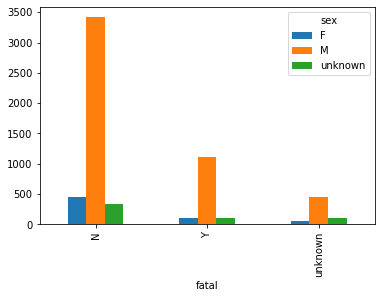

In [127]:
cross.plot(kind='bar')

In [128]:
cross2 = pd.crosstab(index=data.fatal, columns = data.species)
cross2 * 100 / cross.sum().sum()

species,blacktip shark,blue shark,bull shark,galapagos shark,lemon shark,nurse shark,tiger shark,white shark
fatal,,,,,,,,
N,1.606621,0.714054,2.190847,0.064914,0.584226,1.493022,3.343070,8.081792
Y,0.000000,0.146056,0.519312,0.032457,0.016228,0.000000,1.119766,2.418046
unknown,0.016228,0.032457,0.016228,0.000000,0.000000,0.032457,0.064914,0.227199


<AxesSubplot:xlabel='fatal'>

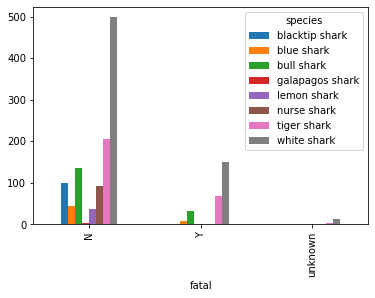

In [129]:
cross2.plot(kind='bar')

In [132]:
cross3 = pd.crosstab(index=data.fatal, columns = data2.country)
cross3 * 100 / cross.sum().sum()

country,AUSTRALIA,BAHAMAS,BRAZIL,ITALY,MEXICO,NEW ZEALAND,PHILIPPINES,SOUTH AFRICA,USA
fatal,,,,,,,,,
N,14.703019,1.476793,1.038624,0.632911,0.567997,1.476793,0.340798,6.588770,29.795521
Y,4.462837,0.162285,0.616683,0.210970,0.697825,0.373255,0.584226,1.606621,3.294385
unknown,2.255761,0.081142,0.162285,0.275884,0.178513,0.210970,0.081142,1.071081,3.440441


<AxesSubplot:xlabel='fatal'>

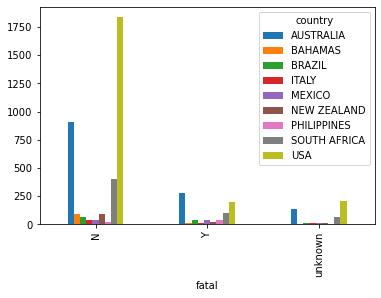

In [133]:
cross3.plot(kind='bar')